# Описание проекта и импорт данных

## Описание заказчика

Заказчик интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Заказчик хочет найти потенциально популярные продукты и спланировать рекламные компании.

## Задачи исследования

**Перед нами несколько задач исследования:**
1. Отработать принцип работы с данными для дальнейших прогнозирований
2. Найти потенциально популярный продукт и спланировать рекламные компании
3. Проверка гипотез:
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
## Описание данных

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Заказчик предоставил данные до 2016 года.

**В датасете присутствуют следующие показатели:**
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Примечание* – Данные за 2016 год могут быть неполными.

## План исследования

1. Импорт библиотек и данных,
2. Предобработка данных,
3. Определение параметров потенциально прибыльной игры,
4. Создание портрета пользователя по регионам
5. Проверка гипотез,
6. Общие выводы.

# Импорт библиотек и данных

## Импорт библиотек

In [2]:

# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as st
import phik
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='svg'


from tqdm import tqdm
from plotly.subplots import make_subplots
from plotly.figure_factory import create_distplot
from functools import reduce

In [3]:
# создаем свой шаблон светлого оформления
bright_colors = ['#' + i for i in ["264653","2a9d8f","e9c46a","f4a261","e76f51"]]
white_template = dict(
    layout=go.Layout(
        width=800,
        plot_bgcolor='white',
        bargap=0.1,
        colorway=bright_colors,
        uniformtext_minsize=10,
        uniformtext_mode='hide',
        xaxis=dict(
            color='black',
            title_text='',
            title_font_color='#808285',
            title_font_size=12,
            showline=True,
            linecolor='#58595B',
            # categoryorder='total descending'
        ),
        yaxis=dict(
            color='black',
            title_font_color='#808285',
            title_font_size=12,
            showgrid=True,
            gridcolor='#E6E7E8',
            showticklabels=True,
            title_standoff=5
            # categoryorder='total ascending'
        ),
        title=dict(
            font=dict(
                color='black',
                size=24
            ),
            x=0,
            xref='paper'
        )
    )
)

# создаем свой шаблон темного оформления
dark_colors = ['#' + i for i in ["678e9f","c0d6df","dbe9ee","4a6fa5","166088"]]
dark_template = dict(
    layout=go.Layout(
        width=800,
        plot_bgcolor='#1A2026',
        paper_bgcolor = '#1A2026',
        bargap=0.1,
        font_color='white',
        uniformtext_minsize=12,
        uniformtext_mode='hide',
        colorway=dark_colors,
        xaxis=dict(
            color='#DAE4E5',
            title='',
            title_font_color='#DAE4E5',
            title_font_size=12,
            showline=True,
            linecolor='#4A586E',
            categoryorder='total descending'
        ),
        yaxis=dict(
            color='#DAE4E5',
            title='',
            title_font_color='#DAE4E5',
            title_font_size=12,
            showgrid=True,
            gridcolor='#4A586E',
            showticklabels=True
        ),
        title=dict(
            font=dict(
                color='#DAE4E5',
                size=24
            ),
            x=0.1
        ),
    )
)

# задаем свой шаблон, как шаблон по умолчанию
px.defaults.template = white_template

## Импорт данных

In [4]:
# Импорт данных
try:
    data = pd.read_csv('datasets/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [5]:
# Выведем первые 5 строк наших данных
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Выведем общую информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# Выведем описательные статистики по количественным данным
data.describe().round(2)

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


## Выводы
Из первого взгляда на данные мы уже можем составить план для предобработки:
* Исправить названия столбцов – перевести их в нижний регистр
* Исправить типы данных – перевести год выпуска, оценку критиков в целочисленный тип, а оценку пользователей во float
* Понять с чем связаны пропуски в стобцах: год выпуска, оценка критиков, оценка пользователей, возрастной рейтинг. Решить, что делать с данными пропусками.

# Предобработка данных

План предобработки данных:
1. Изменение названий столбцов,
2. Обработка пропусков,
3. Приведение типов данных,
4. Добавление столбца с общей выручкой


## Изменение названий столбцов

Переведем названия столбцов в нижний регистр:

In [8]:
# Переводим названия столбцов в нижний регистр
data.columns = [col.lower() for col in data.columns]

# Проверяем изменения
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Отлично, с названиями столбцов разобрались.

## Обработка пропусков

Посмотрим на количество пропусков в столбцах:

In [9]:
# Посмотрим на доли пропущенных данных
data.isna().sum().sort_values(ascending=False) / len(data)

critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
name               0.000120
genre              0.000120
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

В нашем датасете пропуски есть в столбцах – `critic_score`, `rating`, `user_score`, `year_of_release`, `name`, `genre`. Причем в столбцах `critic_score`, `user_score` и `rating` доля пропусков составляет более 40 процентов. С ними нужно разобраться и постараться выяснить причину появления пропусков.

### Обработка пропусков в годах выпуска, названиях, жанрах

В столбцах `year_of_release`, `name` и `genre` пропусков совсем мало, и заполнить их не представляется возможным. Поэтому мы просто удалим строки с пропущенными значениями в данных столбцах.

In [10]:
# Удаляем пропуски в столбцах с годом выхода игры, названием и жанром
print('Количество записей до изменений:', len(data))

data = data.dropna(subset=['year_of_release', 'name', 'genre'])

print('Количество записей после изменений:', len(data))

Количество записей до изменений: 16715
Количество записей после изменений: 16444


### Обработка пропусков в возрастном рейтинге

Разберемся в пропусках в столбцах рейтингом. Визуализируем долю пропусков с накоплением за каждый год по этому столбцу. Для этого сначала подготовим данные:

In [11]:
# создадим таблицу с долей пропусков по годам
to_plot = (
    data.groupby('year_of_release').agg({
        'rating': lambda x: x.isna().sum(),
        'name': 'count'
    })
    .cumsum() # получим сумму пропусков с накоплением
)

# переведем абсолютные значения в относительные
to_plot = (
    to_plot.div(to_plot['name'].values, axis=0)
    .drop(columns='name')
)

Визуализируем долю пропусков:

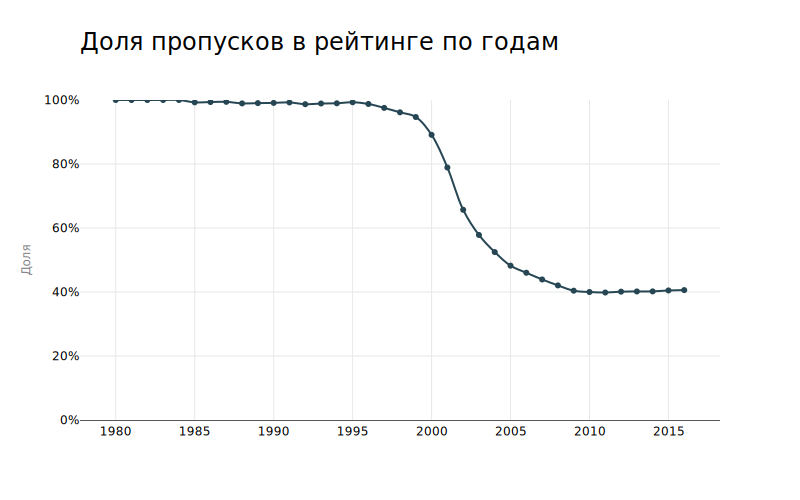

In [12]:
fig = px.line(
    to_plot,
    line_shape='spline',
    markers=True,
    title='Доля пропусков в рейтинге по годам',
    width=800
)

fig.update_layout(
    showlegend=False,
    legend_title='',
    xaxis_title='',
    yaxis_title='Доля',
    yaxis_tickformat='.0%',
    yaxis_range=[0,1]
)

fig.show()

До 1999 года доля пропусков в рейтингах была более 90%. Затем в период с 1999 по 2010, доля игр без рейтинга сократилась более чем на 50 п.п. и вышла на плато на уровне 38%. Скорее всего пропуски обусловлены в большей части тем, что до какого-то времени рейтинги просто не ставились.

В данных некоторые игры на каких-то платформах имеют значение возрастного рейтинга, а на каких-то нет. То есть мы можем взять рейтинг игры на одной платформе и перенести его на другую. Это и сделаем:

In [13]:
# сохраним текущее количество пропусков
rating_na = data['rating'].isna().sum()

# словарь в котором будем хранить названия игр и их рейтинги
to_fill = (
    data[~data['rating'].isna()]
    .groupby('name')
    .agg({'rating': 'first'})
).to_dict()['rating']

# функция для заполения пропущенных значений
# на вход дается строка датафрейма
# если в строке пропуск в столбце с рейтингом, то функция проверяет есть ли название игры в словаре
# если название есть, то она подставляет значение из словаря
def fillna(x):
    if pd.isna(x['rating']) and x['name'] in to_fill.keys():
        return to_fill[x['name']]
    else:
        return x['rating']
    
# заполняем пропуски
data['rating'] = data.apply(fillna, axis=1)

# выведем результат обработки
print('После обработки мы сократили количество пропусков в столбце rating на {:.0%}'
      .format((rating_na - data['rating'].isna().sum())/rating_na))

После обработки мы сократили количество пропусков в столбце rating на 6%


Остальные же пропуски в рейтинге могут быть связаны с тем, что в мире существует не только одна организация, которая присуждает возрастные рейтинги играм. Поэтому остальные пропуски заменим на значение unknown:

In [14]:
# заполняем оставшиеся пропуски
data['rating'] = data['rating'].fillna('unknown')

if data['rating'].isna().sum() == 0:
    print('Пропусков в столбце с возрастным рейтингом больше нет.')

Пропусков в столбце с возрастным рейтингом больше нет.


### Обработка пропусков в оценках критиков и пользователей

Будем действовать по такому же алгоритму как и в случае пропусков в возрастном рейтинге. Но перед тем как считать долю пропусков в столбце `user_score` нам нужно разобраться со значением tbd, которое встречается в этом столбце. Судя по [словарю](https://dictionary.cambridge.org/ru/%D1%81%D0%BB%D0%BE%D0%B2%D0%B0%D1%80%D1%8C/%D0%B0%D0%BD%D0%B3%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9/tbd) tbd – это данные, которые пока не известны. То есть мы можем их также считать пропусками.

То есть перед визуализацией заменим это значение на np.NaN, так как это тоже по сути пропуски:

In [15]:
print('Количество пропусков до обработки {}'.format(data['user_score'].isna().sum()))

# заменяем значения и приводим к типу float
data['user_score'] = data['user_score'].replace('tbd', np.NaN).astype('float')

# проверяем изменения
print('Количество пропусков после обработки {}'.format(data['user_score'].isna().sum()))

Количество пропусков до обработки 6605
Количество пропусков после обработки 8981


Готово, теперь у нас стало еще больше пропусков... пока. Вернемся к визуализации доли пропусков. Подготовим данные к визуализации:

In [16]:
# создадим таблицу с долей пропусков по годам
to_plot = (
    data.groupby('year_of_release').agg({
        'critic_score': lambda x: x.isna().sum(),
        'user_score': lambda x: x.isna().sum(),
        'name': 'count'
    })
    .cumsum() # получим сумму пропусков с накоплением
)

# переведем абсолютные значения в относительные
to_plot = (
    to_plot.div(to_plot['name'].values, axis=0)
    .drop(columns='name')
)

Визуализируем:

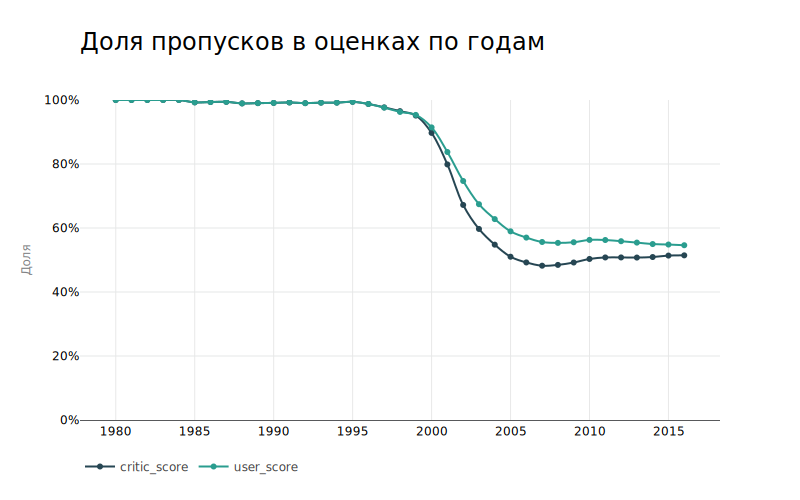

In [17]:
fig = px.line(
    to_plot,
    line_shape='spline',
    markers=True,
    title='Доля пропусков в оценках по годам',
    width=800
)

fig.update_layout(
    legend_orientation='h',
    legend_title='',
    xaxis_title='',
    yaxis_title='Доля',
    yaxis_tickformat='.0%',
    # yaxis_tickmode='array',
    yaxis_range=[0,1]
)

fig.show()

Доля пропусков начала резко сокращаться с 1999 до 2007 года. Затем доля оценок пользователей продолжила снижаться, но уже не такими темпами. А доля пропусков в оценках критиков начала немного расти. Скорее всего игр стало выходить слишком много и критики уже не успевают оценить их все. Либо у нас просто не хватает данных с оценками.

У некоторых игр есть оценки на одних платформах, а на других нет. Заполним пропуски средними значениями оценок с других платформ. Создадим словари со средними значениями оценок:

In [18]:
# словарь со средними значениями оценок критиков
critic_score_mean = (
    data[~data['critic_score'].isna()]
    .groupby('name')['critic_score']
    .mean()
    .to_dict()
)

# словарь со средними значениями оценок пользователей
user_score_mean = (
    data[~data['user_score'].isna()]
    .groupby('name')['user_score']
    .mean()
    .to_dict()
)

Создадим функцию, которая будет заполнять пропуски. На вход она принимает строку данных, столбец для заполнения и словарь из которого будет взято среднее значение. Если в строке пропущена оценка и в ключах словаря есть название игры, то функция возвращает среднюю оценку для данной игры. Если пропуска или названия игры в ключах словаря нет, то функция возвращает исходное значение: пропуск, либо действующее значение.

In [19]:
# функция для заполнения пропусков средними значениями
def fill_mean_score(x, col, score_dict):
    if pd.isna(x[col]) and x['name'] in score_dict.keys():
        return score_dict[x['name']]
    else:
        return x[col]

Заполняем пропуски:

In [20]:
# сохраним текущее количество пропусков
critic_score_na = data['critic_score'].isna().sum()
user_score_na = data['user_score'].isna().sum()

# заполняем пропуски в столбце critic_score
data['critic_score'] = data.apply(lambda x: fill_mean_score(x, 'critic_score', critic_score_mean), axis=1)

# заполняем пропуски в столбце user_score
data['user_score'] = data.apply(lambda x: fill_mean_score(x, 'user_score', user_score_mean), axis=1)

print('После предобработки мы сократили количество пропусков в столбце critic_score на {:.0%}'
      .format(((critic_score_na - data['critic_score'].isna().sum()) / critic_score_na)))

print('После предобработки мы сократили количество пропусков в столбце user_score на {:.0%}'
      .format(((user_score_na - data['user_score'].isna().sum()) / user_score_na)))

После предобработки мы сократили количество пропусков в столбце critic_score на 11%
После предобработки мы сократили количество пропусков в столбце user_score на 12%


## Приведем типы данных

Изменим тип данных в столбце `year_of_release` на целочисленный:

In [21]:
# меняем типы данных:
data['year_of_release'] = data['year_of_release'].astype('int')

# проверяем изменения
if data['year_of_release'].dtype == 'int':
    print('Тип данных изменен')

Тип данных изменен


## Добавим столбец с общей выручкой

У нас есть данные о выручке по регионам, логично будет добавить столбец с общей выручкой игры:

In [22]:
# создаем столбец с общей выручкой
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# выведем первые 5 строк измененного датафрейма
data.head().T

,0,1,2,3,4
name,Wii Sports,Super Mario Bros.,Mario Kart Wii,Wii Sports Resort,Pokemon Red/Pokemon Blue
platform,Wii,NES,Wii,Wii,GB
year_of_release,2006,1985,2008,2009,1996
genre,Sports,Platform,Racing,Sports,Role-Playing
na_sales,41.36,29.08,15.68,15.61,11.27
eu_sales,28.96,3.58,12.76,10.93,8.89
jp_sales,3.77,6.81,3.79,3.28,10.22
other_sales,8.45,0.77,3.29,2.95,1.0
critic_score,76.0,NaN,82.0,80.0,NaN
user_score,8.0,NaN,8.3,8.0,NaN


## Выводы по предобработке данных

В ходе предобработки данных мы:
1. Перевели названия столбцов в нижний регистр,
2. Сократили количество пропусков в столбцах:
    * `rating` – на 6%,
    * `user_score` – на 12%,
    * `critic_score` – на 11%,
3. Изменили тип данных в столбце `year_of_release` с float на int,
4. Добавили столбцец `total_sales` с выручкой по всем регионам.

# Определение параметров потенциально прибыльной игры

Главная цель исследования определить параметры потенциально прибыльной игры.

На данном этапе определим параметры потенциально прыбильной игры: платформу, жанр, возрастной рейтинг. Критерием выбора будет доля и динамика выручки по параметру. То есть нам подойдет те платформа, жанр, возростной рейтинг на которые приходится высокая доля выручки и у которых наблюдается положительная тенденция.

Помимо этого попробуем выяснить как влияют оценки критиков и пользователей на продажи игры.

План исследовательского анализа данных:
1. Выбор периода исследования,
2. Выбор платформы,
3. Выбор жанра,
4. Выбор возрастного рейтинга,
5. Исследование влияния оценок критиков и пользователей на продажи.

## Выбор периода исследования

Перед тем как анализировать данные выделим актуальный период для анализа. Основной критерий для выбора такого периода – польза для определения потенциально популярного продукта. Также нам важно будет на основе выбранных данных понимать динамику и состояние рынка игр.

Помочь с выбором нам может гистограмма выпуска игр по годам:

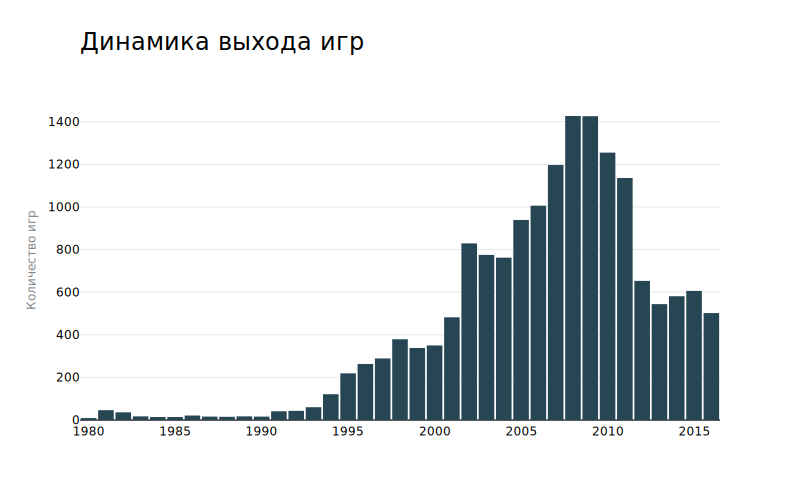

In [23]:
# распределение игр по дате выхода
fig = px.histogram(
    data_frame=data,
    x='year_of_release',
    title='Динамика выхода игр',
    width=800
)

fig.update_layout(
    yaxis_title='Количество игр',
    xaxis_title='',
)
fig.show()

На гистограмме видно несколько периодов развития игровой индустрии. Попробуем предположить, что это за периоды:
1. 1980-1993 – период становления. В этот период выпускалось очень мало игр, и рынок только зарождался. Это абсолютно нормально и объясняется тем, что в этот период сами платформы только-только зарождались и были по большей части недоступны для массового пользователя.
2. 1994-2001 – период роста. Вместе с ростом рынка платформ и их доступности, растет и рынок игр. Появляется все больше потенциальных потребителей и соответственно за ним растет и предложение.
3. 2002-2011 – период поиска. В этот период платформы стали полностью доступны для большого числа людей. Мы назвали этот период "периодом поиска" так как судя по пиковым показателям выпуска игр, в это время производители игр искали, что нужно пользователю.
4. 2012-... – период взросления. Игровая индустрия сократила выпуск игр почти в 2 раза. Судя по всему производители нашли, то что нужно пользователю и сосредоточились на качестве игр.

Для определения параметров потенциально прибыльной игры нам пригодятся данные только за последние 3 года – с 2014 по 2016. Но для понимания контекста оставим данные с 2012 года. Более старые данные нам не пригодятся.

In [24]:
# оставляем только актуальный период
data = data.query('year_of_release > 2011').reset_index(drop=True)

# выведем количество записей, которые остались
print('После среза данных осталось {} строк.'.format(len(data)))

После среза данных осталось 2886 строк.


### Функция для построения графика динамики

В целом логика будет выбора параметров будет следующая:
1. Строим график динамики прибыли в разрезе параметра,
2. Выбираем те значения, которые показывают положительную динамику с 2014 года,
3. Выбираем из значений с положительной динамикой те, которые обладают самой большой долей выручки.

Так как платформу, жанр и возрастной рейтинг мы будем определять по одному и тому же алгоритму, то напишем функцию.

Функция принимает на вход столбец по которому будем отслеживать динамику. Она вычисляет долю каждого значения по году и на выходе строит график, где выделены значения которые за последние два года выросли.

In [25]:
# функция для построоения динамики
def plot_dynamic(column, title, region='total_sales'):

    # готовим данные
    df = data.pivot_table(
        index=column,
        columns='year_of_release',
        values=region,
        aggfunc='sum'
    )

    # переводим абсолютные значения в относительные
    for col in df.columns:
        df[col] = df[col].div(df[col].sum(), axis=0)
    
    # транспонируем, округляем и заполняем пропуски
    df = df.T.round(3).fillna(0)

    # строим график
    fig = go.Figure()

    for col in df.columns:
        # добавляем линии на график
        flag = int(df.loc[2014, col] < df.loc[2016, col])
        fig.add_trace(
            go.Scatter(
                y=df[col],
                x=df.index,
                line_shape='spline',
                line_color=('#BCBEC0', bright_colors[1])[flag],
                name=col,
            )
        )
        
        # добавляем подпись к линии, если доля растет
        if flag:
            fig.add_annotation(
                xref="paper",
                x=0.95,
                y=df.loc[2016, col],
                text=col,
                xanchor='left',
                font_color=bright_colors[1],
                font_size=14,
                showarrow=False
            )
                   
    fig.update_layout(
        title = title,
        width=800,
        template=white_template,
        showlegend=False,
        yaxis_tickformat='.0%',
        xaxis_tickvals=sorted(data['year_of_release'].unique())
    )

    return fig

## Выбор платформы

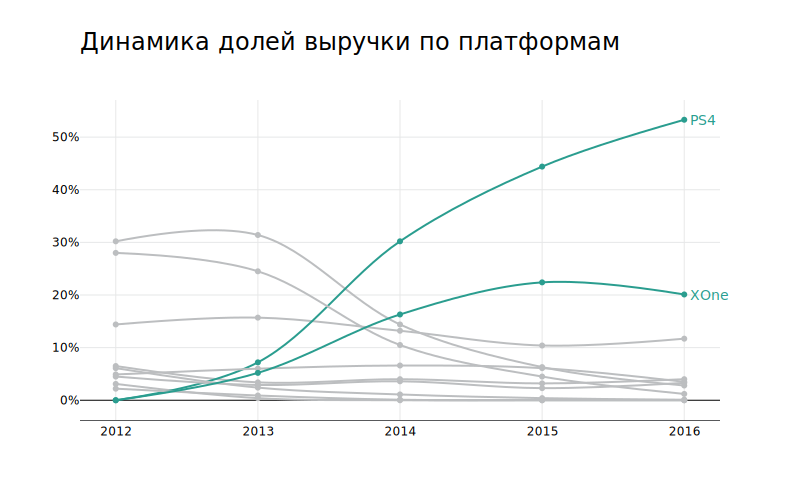

In [26]:
plot_dynamic('platform', 'Динамика долей выручки по платформам')

Почти 75% выручки со всего рынка игр приходится на 2 платформы: PS4 и XOne. Также эти платформы показывают положительную динамику за последние 2 года. Особенно выделяется PS4 – в 2013 году на эту платформу приходилось 7% всей выручки, а в 2016 году уже 53%.

По нашим критериям подходят 2 платформы: PS4 и XOne.

## Выбор жанра

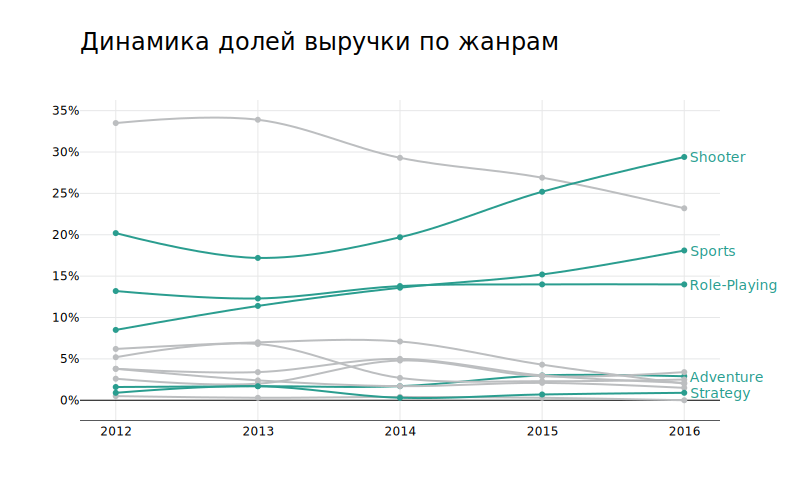

In [27]:
plot_dynamic('genre', 'Динамика долей выручки по жанрам')

Cамым привлекательным жанром выглядит Shooter. У этого жанра самая большая доля выручки (29%) и за последние два года среднегодовой рост этого показателя составляет почти 5 п. п. Также высокая доля выручки и тенденция к росту видна у жанра Sports.

По нашим критериям подходят 2 жанра: Shooter и Sports.

## Выбор возрастного рейтинга

Для начала интерпретируем возрастные рейтинги.

Согласно Википедии:
* E – для игроков от 6 лет.
* E10+ – для игроков от 10 лет.
* T – для игроков от 13 лет.
* M – для игроков от 17 лет.

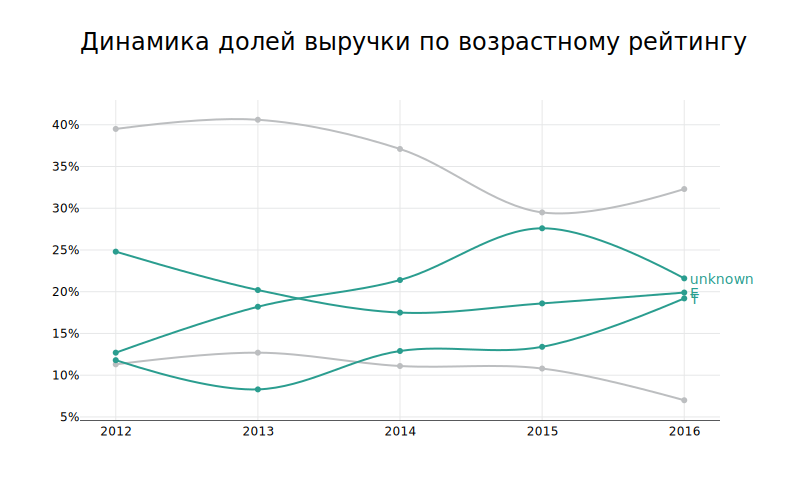

In [28]:
plot_dynamic('rating', 'Динамика долей выручки по возрастному рейтингу')

С возрастным рейтингом все немного сложнее. С одной стороны самая большая доля выручки приходится на рейтинг M. Но с другой стороны у этого рейтинга нет тенденции к росту. Заметнее всего рост у рейтинга T – с 12% в 2013 году до 24% в 2016 году. Поэтому из рейтингов выберем M (как рейтинг с самой большой долей на 2016 год) и T (как рейтинг с самой заметной тенденцией к росту). Также относительно высокая доля выручки у игр с неизвестным рейтингом. Также она имела положительную динмику до 2016 года.

## Изучение влияния оценок критиков и пользователей на продажи

### Оценка критиков vs Выручка

Посмотрим как влияет на продажи оценка критиков:

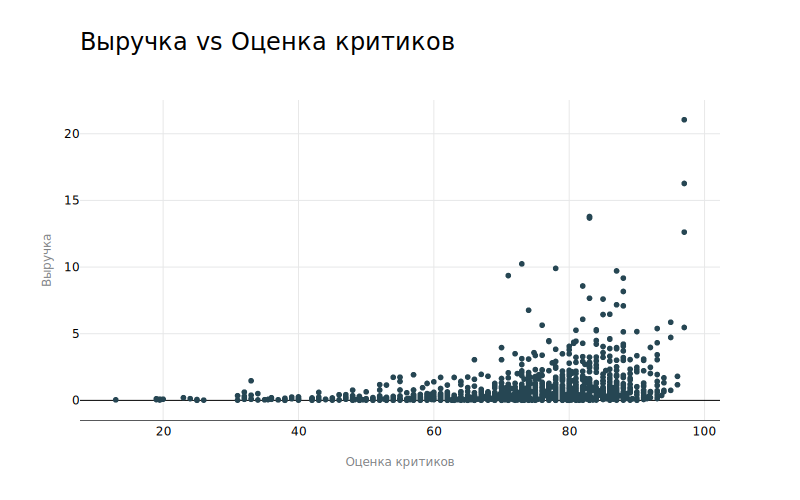

In [29]:
# строим диаграмму рассеяния
fig = px.scatter(
    data_frame=data,
    x='critic_score',
    y='total_sales',
    width=800,
    title='Выручка vs Оценка критиков'
)

fig.update_layout(
    xaxis_title='Оценка критиков',
    yaxis_title='Выручка'
)

fig.show()

In [30]:
# выведем phik корреляцию – она лучше улавливает нелинейную взаимосвязь
corr = data[['critic_score', 'total_sales']].phik_matrix().loc['total_sales', 'critic_score']
print('Корреляция межу оценкой критиков и выручкой {:.2f}'.format(corr))

interval columns not set, guessing: ['critic_score', 'total_sales']
Корреляция межу оценкой критиков и выручкой 0.21


Из полученного графика можно сделать вывод, что как правило у хорошо продаваемой игры высокая оценка критиков, но не обязательно у игры с высокой оценкой критиков хорошие продажи. Корреляция подтверждает, что между этими показателями есть небольшая положительная связь.

### Оценка пользователей vs Выручка

Посмотрим на влияние оценки пользователей на выручку:

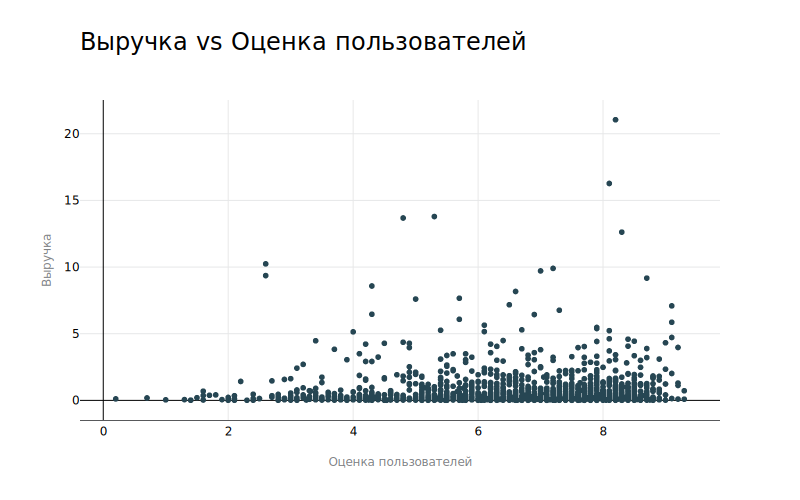

In [31]:
# строим диаграмму рассеяния
fig = px.scatter(
    data_frame=data,
    x='user_score',
    y='total_sales',
    width=800,
    title='Выручка vs Оценка пользователей'
)

fig.update_layout(
    xaxis_title='Оценка пользователей',
    yaxis_title='Выручка'
)

fig.show()

In [32]:
# выведем phik корреляцию – она лучше улавливает нелинейную взаимосвязь
corr = data[['user_score', 'total_sales']].phik_matrix().loc['total_sales', 'user_score']
print('Корреляция межу оценкой критиков и выручкой {:.2f}'.format(corr))

interval columns not set, guessing: ['user_score', 'total_sales']
Корреляция межу оценкой критиков и выручкой 0.08


На графике видно, что есть игры с очень низкой оценкой пользователей, но относительно высокими продажами. Вполне вероятно, что такая ситуация может произойти от того, что пользователи очень ждали какую-то игру и делали предзаказы или покупали ее в первые дни выхода. Тем самым они влияли на показатель выручки. Но игра не оправдала их ожиданий и соответственно получила низкую оценку.

Корреляция также слишком низкая, поэтому прогнозировать выручку опираясь на оценку пользователей сложно.

## Выводы

На данном этапе мы выбирали параметры потенциально прибыльной игры. Мы посмотрели на распределение выхода игр по годам, и решили, что принимать решение будем на основе данных за 2014-2016 года. 

Вот какие параметры мы определили:
1. Платформа:
    * PS4 – на эту платформу приходится 53% выручки и эта доля растет из года в год.
    * XOne – вторая платформа по показателю доли выручки – 20%. За последний год доля немного снизилась (на 2 п.п.), но все еще остается достаточно высокой.
2. Жанр:
    * Shooter – доля выручки 29% и за последние два года среднегодовой рост почти в 5 п.п.
    * Sports – доля выручки 18% и заметная тенденция роста.
3. Возрастной рейтинг:
    * M – доля выручки 41%, но есть проблемы с тенденцией – с 2013 года она упала на 9 п.п., а с 2015 по 2016 год стагнирует.

Также мы исследовали влияние оценок пользователей и критиков на выручку. Как правило у игры с большой выручкой высокая оценка критиков, но не обязательно у игры с высокой оценкой критиков высокая выручка. Корреляция между этими показателями невысокая – 0,21. Оценка пользователей еще меньше влияет на выручку – корреляция 0,08.

# Создание портрета пользователя по регионам

На этом шаге изучим пользователей в следующих регионах:
* Северная Америка
* Европа
* Япония

Для пользователей каждого региона узнаем посмотрим распределение выручки в разрезе:
* платформы,
* жанра,
* возрастного рейтинга

По этим данным мы сможем сделать первые наброски портрета пользователя для каждого региона.

Регионы мы будем изучать за интересующий для нас период – с 2014 года включительно. Поэтому сразу сделаем срез данных:

In [33]:
# делаем срез по данным с 2013 года
data = data.query('year_of_release > 2013')

print('После среза осталось {} записей'.format(len(data)))

После среза осталось 1689 записей


Теперь посмотрим на распределение выручки по регионам:

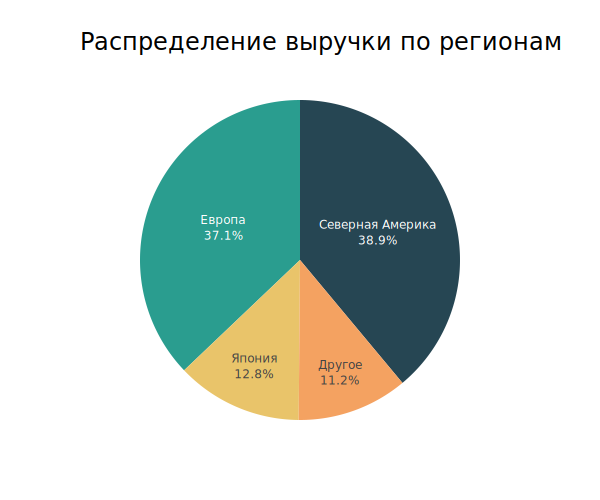

In [34]:
# готовим данные для визуализации
to_plot = pd.DataFrame({
            'Eвропа': [data['eu_sales'].sum()],
            'Северная Америка': [data['na_sales'].sum()],
            'Япония': [data['jp_sales'].sum()],
            'Другое': [data['other_sales'].sum()]
           }).T

# строим визуализацию
fig = px.pie(
    to_plot,
    values=0,
    names=to_plot.index,
    width=600,
    title='Распределение выручки по регионам'
)

fig.update_traces(
    textinfo='percent+label',
    showlegend=False
    )

fig.show()

### Подготовим функции

Главным инструментом для сравнения долей будет горизонтальная столбчатая диаграмма. Чтобы автоматизировать процесс ее построения напишем функции.

Первая функция `get_data_to_plot` будет подготавливать данные для визуализации, а вторая `get_plot_by_region` будет стоить визуализацию.

Функция `get_plot_by_region` принимает на вход 2 параметра:
* `region` – регион, который нас интересует. Из него мы будем брать данные по выручке, на основании которых будем строить график.
* `title` – заголовок для графика.

Функция вернет диаграмму с 3 столбчатыми графиками – 5 самых популярных платорм, 5 самых популярных жанров и распределение выручки между возрастными рейтингами. Критерий популярности также будет выручка в конкретном регионе.


In [35]:
# функция для подготовки данных для визуализации
def get_data_to_plot(column, region):
    
    # группируем данные по интересующему нам параметру
    df = data.groupby(column).agg({region: 'sum'})
    
    # переводим абсолютные значения в относительные и делаем срез топ-5 значений
    df = (
        df.div(df[region].sum(), axis=0)
        .sort_values(by=region, ascending=False)
        .reset_index()
        .iloc[:5]
    )
    
    return df

In [36]:
# функция визуализации 
def get_plot_by_region(region, title):
    
    # создаем фигуру
    fig = make_subplots(
        subplot_titles=['Платформа', 'Жанр', 'Рейтинг'],
        horizontal_spacing=0.1,
        cols=3, 
        rows=1
        )

    # строим графики
    for i, param in enumerate(['platform', 'genre', 'rating']):
        to_plot = get_data_to_plot(param, region)
        fig.add_bar(
            y=to_plot[param],
            x=to_plot[region],
            orientation='h',
            text=to_plot[region],
            texttemplate='%{x:.0%}',
            row=1,
            col=i+1,
        )
        
        fig.update_xaxes(
            tickformat='.0%'
        )

    fig.update_yaxes(
        categoryorder='total ascending',
        showgrid=False
    )
    
    fig.update_layout(
        template=white_template,
        showlegend=False,
        title=title +'<br><sup style="color: #808285">за период с 2014 по 2016 год</sup>',
        title_y=0.9,
        margin_t=120,
        bargap=0.4,
    )
    
    fig.show()

## Изучение пользователей Северной Америки

На Северную Америку приходится 39% всей мировой выручки от продаж игр за 2014-2016 годы. Посмотрим, что характеризует этот рынок:

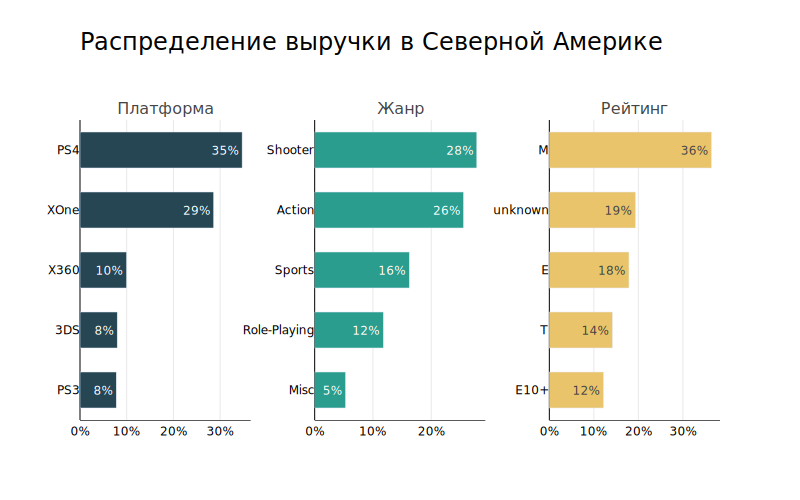

In [37]:
get_plot_by_region('na_sales', 'Распределение выручки в Северной Америке')

Характеристика пользователей из Северной Америки:
* Платформа: 2 платформы занимают 64% рынка – PS4 (35%) и XOne(29%), остальные платформы не переходят порог в 10%.
* Жанр: самые популярные жанры shooter (28%) и action (26%), помимо них весомую долю занимают жанры sports и role-playing.
* Возрастной рейтинг: больше всего выручки приносят игры с возрастным рейтингом M, это может говорить о том, что в регионе достаточно зрелая аудитория.

## Изучение пользователей Европы

Европа – второй рынок по объему выручки, на нее приходится 37% мировой выручки. Она уступает всего лишь 2 п.п. Северной Америке. Посмотрим на распределение выручки в этом регионе:

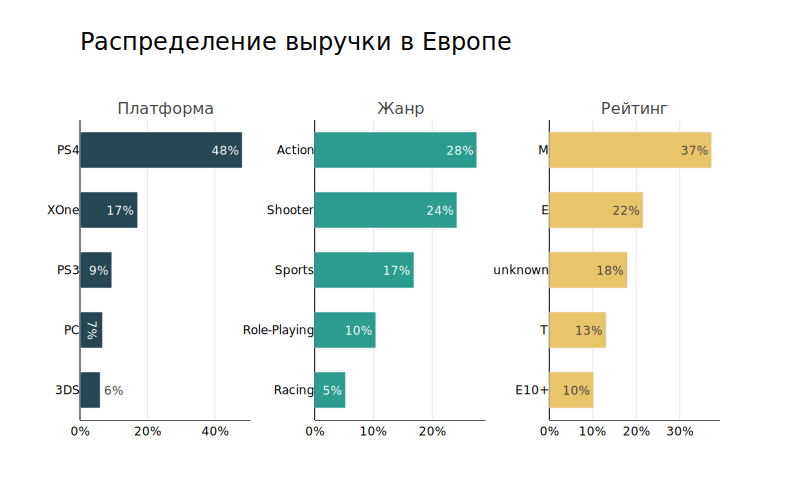

In [38]:
get_plot_by_region('eu_sales', 'Распределение выручки в Европе')

Характеристика пользователей из Европы:
* Платформа: среди платформ явно доминирует PS4 – ее доля 48% от всей выручки в этом регионе. 
* Жанр: предпочтения европейцев в жанрах не сильно отличаются от предпочтений североамериканцев – самые популярные жанры Action, Shooter и Sports. На эти 3 жанра приходится почти 70% всей выручки.
* Возрастной рейтинг: больше всего выручки у игр с рейтингом M (37%)

## Изучение пользователей из Японии

Япония относительно небольшой рынок, по сравнению с Северной Америкой и Европой. На нее приходится около 13% всей мировой выручки. 

Смотрим на распределение выручки в этом регионе:

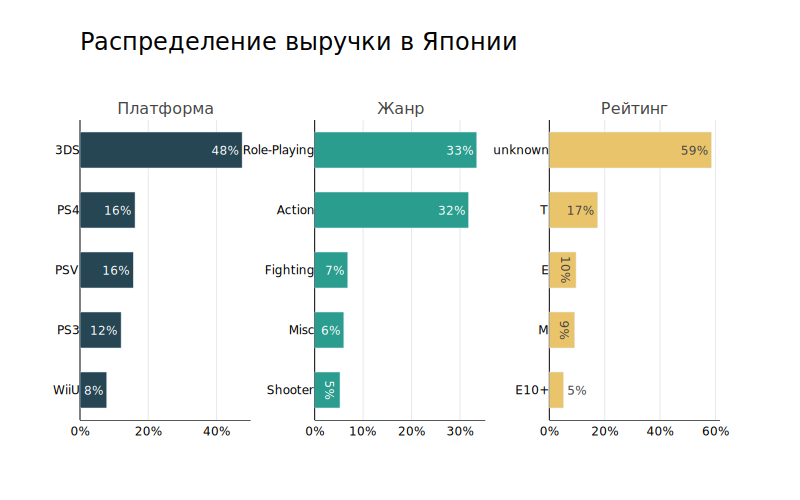

In [39]:
get_plot_by_region('jp_sales', 'Распределение выручки в Японии')

Характеристика пользователей из Японии:
* Платформа: в Японии пользователи предпочитают портативные консоли – почти 50% рынка приходится на консоль 3DS. Также видно что на этом рынке отдают предпочтения местным производителям – в топ-5 представлены консоли только японских производитеолей.
* Жанр: в Японии две трети выручки приходятся на жанры role-playing (33%) и action (32%)
* Возрастной рейтинг: Большая часть выручки (59%) ушла играм с неизвестным рейтингом. Все дело в том, что в Японии основная организация присваивающая рейтинг – [SERO](https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization), а не ESRB.

## Изучение пользователей из других регионов

Остальные регионы суммарно дают 11% выручки, что немного меньше Японии. Так что охарактеризуем и их тоже:

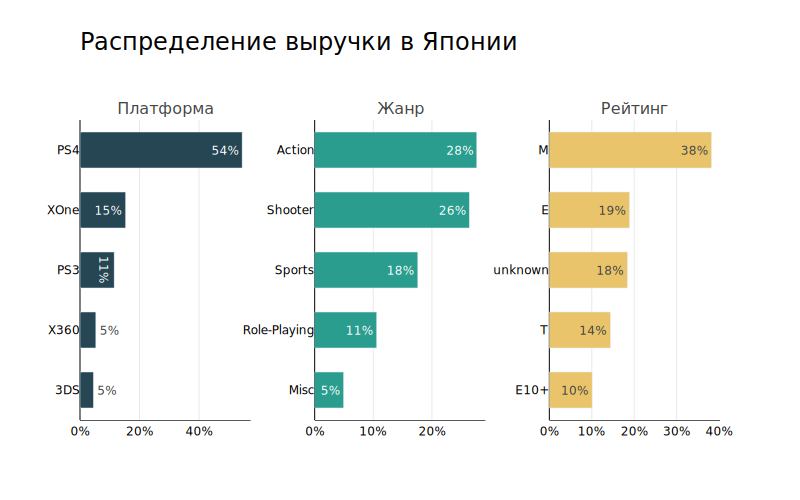

In [40]:
get_plot_by_region('other_sales', 'Распределение выручки в Японии')

Характеристика пользователей из других регионов:
* Платформа: здесь однозначный лидер PS4 с долей в 54%,
* Жанры: распределение жанров очень напоминает европейское – лидеры action, shooter, sports,
* Возрастной рейтинг: здесь также ситуация напоминает европейскую и североамериканскую – 38% приходится на рейтинг M.

## Выводы

Мы посмотрели как распределена выручка в разных регионах в целом и в разрезах платформы, жанра и возрастного рейтинга. На основе полученных результатов мы сделали вывод о предпочтениях пользователей из разных регионов и дали им характеристики.

В целом распределение выручки такое:
1. Северная Америка – 39%,
2. Европа – 37%,
3. Япония – 13%,
4. Остальной мир – 11%

**Характеристика пользователей из Северной Америки:**
* Платформа: 2 платформы занимают 64% рынка – PS4 (35%) и XOne(29%), остальные платформы не переходят порог в 10%.
* Жанр: самые популярные жанры shooter (28%) и action (26%), помимо них весомую долю занимают жанры sports и role-playing.
* Возрастной рейтинг: больше всего выручки приносят игры с возрастным рейтингом M, это может говорить о том, что в регионе достаточно зрелая аудитория.

**Характеристика пользователей из Европы:**
* Платформа: среди платформ явно доминирует PS4 – ее доля 48% от всей выручки в этом регионе. 
* Жанр: предпочтения европейцев в жанрах не сильно отличаются от предпочтений североамериканцев – самые популярные жанры Action, Shooter и Sports. На эти 3 жанра приходится почти 70% всей выручки.
* Возрастной рейтинг: больше всего выручки у игр с рейтингом M (37%)

**Характеристика пользователей из Японии:**
* Платформа: в Японии пользователи предпочитают портативные консоли – почти 50% рынка приходится на консоль 3DS. Также видно что на этом рынке отдают предпочтения местным производителям – в топ-5 представлены консоли только японских производитеолей.
* Жанр: в Японии две трети выручки приходятся на жанры role-playing (33%) и action (32%)
* Возрастной рейтинг: Большая часть выручки (59%) ушла играм с неизвестным рейтингом. Все дело в том, что в Японии основная организация присваивающая рейтинг – [SERO](https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization), а не ESRB.

**Характеристика пользователей из других регионов:**
* Платформа: здесь однозначный лидер PS4 с долей в 54%,
* Жанры: распределение жанров очень напоминает европейское – лидеры action, shooter, sports,
* Возрастной рейтинг: здесь также ситуация напоминает европейскую и североамериканскую – 38% приходится на рейтинг M.

# Проверка гипотез

На этом этапе мы проверим две гипотезы:
1. Средние пользовательские оценки на платформах Xbox One и PC одинаковые;
2. Средние пользовательские оценки у жанров Action и Sports разные.

Алгоритм проверки гипотез будет следующий:
1. Определяем уровень значимости alpha,
2. Изучаем статистику и распределения,
3. Формулируем нулевую и альтернативную гипотезы,
4. Проводим статистический тест,
5. Интерпретируем результаты.


Уровень значимости для тестов возьмем **alpha = 0.05**

In [41]:
# Определяем уровень значимости
alpha = 0.05

## Проверка гипотезы о средних пользовательских оценках Xbox One и PC

Для начала изучим данные. построим на распределения и изучим статистику:

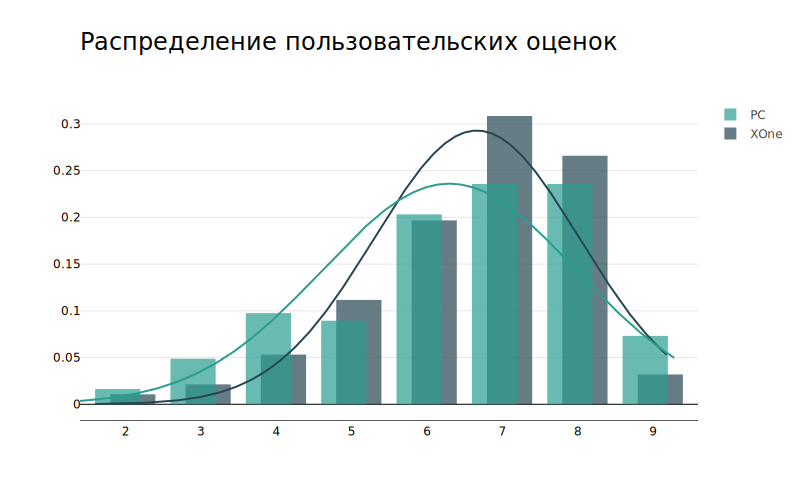

In [42]:
# готовим данные
hist_data_xone = data.query('platform == "XOne"')['user_score'].dropna()
hist_data_pc = data.query('platform == "PC"')['user_score'].dropna()

# строим диаграмму
fig = create_distplot(
    hist_data= [hist_data_xone, hist_data_pc],
    group_labels=['XOne', 'PC'],
    colors=bright_colors,
    show_rug=False,
    curve_type='normal'
)

fig.update_layout(
    template=white_template, 
    bargap=0.4, 
    width=800,
    title='Распределение пользовательских оценок')

fig.show()

In [43]:
# Изучим статистику
data.query('platform in ["XOne", "PC"]').dropna().pivot_table(
    index='platform',
    values='user_score',
    aggfunc=['count', 'mean', np.var]
)

,count,mean,var
,user_score,user_score,user_score
platform,,,
PC,119,6.300560,2.873992
XOne,183,6.655965,1.858946


По статистике видно, что у нас разные размеры выборок и разная дисперсия. Для проверки гипотез на таких выборках нам подойдет t-критерий Уэлча.

Определим гипотезы:
* H0: Средние пользовательские оценки игр на Xbox One и PC равны
* H1: Средние пользовательские оценки игр на Xbox One и PC разные

Проведем тест:

In [44]:
# Проводим тест
result = st.ttest_ind(data.query('platform == "XOne"')['user_score'].dropna(),
                      data.query('platform == "PC"')['user_score'].dropna(),
                      equal_var=False
                       ).pvalue
# Анализируем pvalue
print(f'p-value: {result:.4f}')
if result < alpha:
    print('Отвергаем нулевую гипотезу и принимаем альтернативную.')
else:
    print('У нас недостаточно оснований для отвержения нулевой гипотезы.')

p-value: 0.0467
Отвергаем нулевую гипотезу и принимаем альтернативную.


P-value оказался ниже порога уровня значимости, значит мы можем отклонить нулевую гипотезу и принять альтернативную. То есть, исходя из имеющихся данных, мы можем сказать, что средние оценки пользователей на платформах XOne и PC статистически значимо отличаются.

## Проверка гипотезы о пользовательских оценказ жанров Action и Sports

Для начала изучим данные. построим на распределения и изучим статистику:

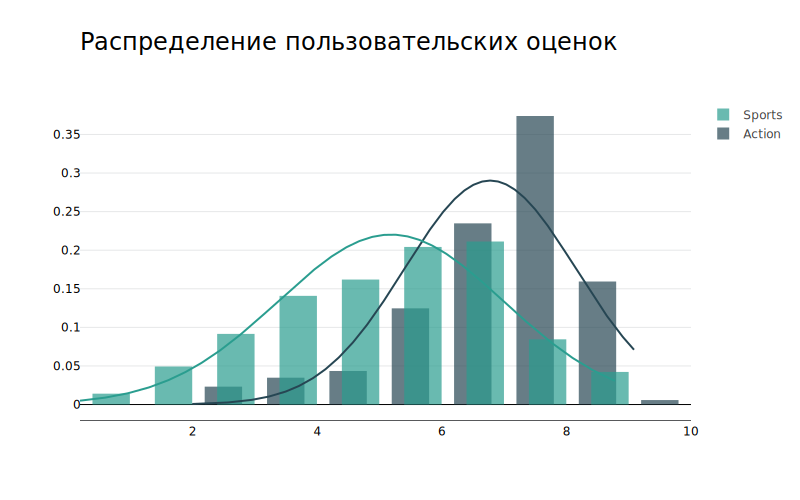

In [45]:
# готовим данные
hist_data_action = data.query('genre == "Action"')['user_score'].dropna()
hist_data_sports = data.query('genre == "Sports"')['user_score'].dropna()

# строим диаграмму
fig = create_distplot(
    hist_data= [hist_data_action, hist_data_sports],
    group_labels=['Action', 'Sports'],
    colors=bright_colors,
    show_rug=False,
    curve_type='normal'
)

fig.update_layout(
    template=white_template,
    bargap=0.4,
    width=800,
    title='Распределение пользовательских оценок'
    )

fig.show()

In [46]:
# Изучим статистику
data.query('genre in ["Action", "Sports"]').dropna().pivot_table(
    index='genre',
    values='user_score',
    aggfunc=['count', 'mean', np.var]
)

,count,mean,var
,user_score,user_score,user_score
genre,,,
Action,330,6.796869,1.813928
Sports,139,5.228417,3.292103


Ситуация такая же как и при проверке предыдущей гипотезы: размеры выборок и дисперсии разные. Проверять опять будем при помощи t-критерия Уэлча.

Определим гипотезы:
* H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
* H1: Средние пользовательские рейтинги жанров Action и Sports разные

In [47]:
# Проводим тест
result = st.ttest_ind(data.query('genre == "Action"')['user_score'].dropna(),
                      data.query('genre == "Sports"')['user_score'].dropna(),
                      equal_var=False
                       ).pvalue
# Анализируем pvalue
print(f'p-value: {result:.30f}')
if result < alpha:
    print('Отвергаем нулевую гипотезу и принимаем альтернативную.')
else:
    print('У нас недостаточно оснований для отвержения нулевой гипотезы.')

p-value: 0.000000000000000010380665060277
Отвергаем нулевую гипотезу и принимаем альтернативную.


Значение p-value крайне мало, а значит, что вероятность получить текущие результаты при верной нулевой гипотезе о равенстве средних крайне мала. Это позволяет нам отвергнуть нулевую гипотезу и сделать вывод о том, что пользовательская оценка у жанров Action и Sports разная.

## Выводы

Мы посмотрели на данные и проверили гипотезы с помощью t-критерия Уэлча, и получили следующие выводы:
* Средние оценки пользователей на платформах PC и Xbox One статистически значимо отличаются.
* Средние оценки пользователей по жанрам Sports и Action статистически значимо отличаются.

# Общие выводы

### Преобразования в данных

Напомним, какие преобразования мы сделали:`
* Удалили записи с пропусками в столбцах `year_of_release`, `name` и `genre`. Всего удалилось около 1% записей.
* Заполнили некоторые пропуски в столбце с возрастным рейтингом. Для этого мы нашли игры, которые имели рейтинг на одной платформе, а на другой не имели. В итоге мы сократили количество пропусков в этом столбце на 6%.
* У некоторых игр были пропуски в оценках критиков и пользователей на одних платформах, а на других нет. Для таких игр мы взяли среднюю оценку по всем платформам и заполнили пропуски этим значением. Так мы сократили количество пропусков в столбце `user_score` на 12%, а в столбце `critic_score` на 11%.
* Привели столбец `year_of_release` к типу int.
* Добавили столбец с общей выручкой и назвали его `total_sales`.

### Определение параметров потенциально прибыльной игры

Вот какие параметры мы определили:
1. Платформа:
    * PS4 – на эту платформу приходится 53% выручки и эта доля растет из года в год.
    * XOne – вторая платформа по показателю доли выручки – 20%. За последний год доля немного снизилась (на 2 п.п.), но все еще остается достаточно высокой.
2. Жанр:
    * Shooter – доля выручки 29% и за последние два года среднегодовой рост почти в 5 п.п.
    * Sports – доля выручки 18% и заметная тенденция роста.
3. Возрастной рейтинг:
    * M – доля выручки 41%, но есть проблемы с тенденцией – с 2013 года она упала на 9 п.п., а с 2015 по 2016 год стагнирует.

Также мы исследовали влияние оценок пользователей и критиков на выручку. Как правило у игры с большой выручкой высокая оценка критиков, но не обязательно у игры с высокой оценкой критиков высокая выручка. Корреляция между этими показателями невысокая – 0,21. Оценка пользователей еще меньше влияет на выручку – корреляция 0,08.

### Создание портрета пользователя по регионам

Мы посмотрели как распределена выручка в разных регионах в целом и в разрезах платформы, жанра и возрастного рейтинга. На основе полученных результатов мы сделали вывод о предпочтениях пользователей из разных регионов и дали им характеристики.

В целом распределение выручки такое:
1. Северная Америка – 39%,
2. Европа – 37%,
3. Япония – 13%,
4. Остальной мир – 11%

**Характеристика пользователей из Северной Америки:**
* Платформа: 2 платформы занимают 64% рынка – PS4 (35%) и XOne(29%), остальные платформы не переходят порог в 10%.
* Жанр: самые популярные жанры shooter (28%) и action (26%), помимо них весомую долю занимают жанры sports и role-playing.
* Возрастной рейтинг: больше всего выручки приносят игры с возрастным рейтингом M, это может говорить о том, что в регионе достаточно зрелая аудитория.

**Характеристика пользователей из Европы:**
* Платформа: среди платформ явно доминирует PS4 – ее доля 48% от всей выручки в этом регионе. 
* Жанр: предпочтения европейцев в жанрах не сильно отличаются от предпочтений североамериканцев – самые популярные жанры Action, Shooter и Sports. На эти 3 жанра приходится почти 70% всей выручки.
* Возрастной рейтинг: больше всего выручки у игр с рейтингом M (37%)

**Характеристика пользователей из Японии:**
* Платформа: в Японии пользователи предпочитают портативные консоли – почти 50% рынка приходится на консоль 3DS. Также видно что на этом рынке отдают предпочтения местным производителям – в топ-5 представлены консоли только японских производитеолей.
* Жанр: в Японии две трети выручки приходятся на жанры role-playing (33%) и action (32%)
* Возрастной рейтинг: Большая часть выручки (59%) ушла играм с неизвестным рейтингом. Все дело в том, что в Японии основная организация присваивающая рейтинг – [SERO](https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization), а не ESRB.

**Характеристика пользователей из других регионов:**
* Платформа: здесь однозначный лидер PS4 с долей в 54%,
* Жанры: распределение жанров очень напоминает европейское – лидеры action, shooter, sports,
* Возрастной рейтинг: здесь также ситуация напоминает европейскую и североамериканскую – 38% приходится на рейтинг M.

### Проверка гипотез

У нас были даны 2 гипотезы:
1. Средние пользовательские оценки на платформах Xbox One и PC одинаковые;
2. Средние пользовательские оценки у жанров Action и Sports разные.

Мы проверили их при помощи t-критерия Уэлча, потому что дисперсии в выборках оказались разные. Уровень значимости мы выбрали 0.05.

По результатам проверки мы получили:
1. Исходя из имеющихся данных, мы можем сказать, что средние оценки пользователей на платформах XOne и PC статистически значимо отличаются. 
2. Исходя из имеющихся данных, мы можем сказать, что пользовательская оценка у жанров Action и Sports разная.

### Итого

По итогу мы выполнили все задачи, которые стояли перед нами. Мы отработали принцип работы с данными, то есть сможем по текущему алгоритму анализировать данные и за последующие периоды. Мы определили какие продукты становятся попурными, в целом по миру и отдетьно по нескольким регионам. Также мы проверили некоторые гипотезы.